In [1]:
import csv

def load_data(filename):
    # if we do not write the mode, is 'r' by default, equivalent to with open(filename, 'r') as f
    with open(filename) as f:
        data = csv.reader(f)
        # easy way to remove the header (1st line)
        header = next(data)
        
        rows = []
        for x in data:
            rows.append(x)
    
    return header, rows
            
header2017, data2017 = load_data('daily 2017_our project.csv')
header2016, data2016 = load_data('daily 2016_our project.csv')
data = data2016 + data2017
# print(data[0])
print(header2016)
print(header2017)

print(len(data2016[0]))
print(len(data2017[0]))

country_names = []
for row in data:
    if row[1] not in country_names:
        country_names.append(row[1])
print(country_names)
# print(data[1][3])

['Report Date', 'Country name', 'Cumulative Total', 'Cumulative Land', 'Cumulative Sea']
['Report Date', 'Country name', 'Cumulative Total', 'Cumulative Land', 'Cumulative Sea']
5
5
['Bulgaria', 'Croatia', 'Greece', 'Hungary', 'Italy', 'Former Yugoslav Republic of Macedonia', 'Serbia', 'Slovenia', 'Cyprus', 'fYR of Macedonia']


In [2]:
def total_by_country (country, data):
    total = 0
    for row in data:
        if country in row [1]:
            if int(row[2].replace(',','')) > total:
                total = int(row[2].replace(',',''))
                
    return total

def total_by_month_and_country (country, month, data):
    total = 0
    for row in data:
        if country in row [1]:
            if row[1] == country and month in row[0]:
                if int(row[2].replace(',','')) > total:
                    total = int(row[2].replace(',',''))
                
    return total

In [3]:
def get_total_per_month_sea(country, month, data):
    result = 0
    for row in data:
        if row[1] == country and month in row[0]:
            result += int(row[4].replace(',',''))
    return result

print(get_total_per_month_sea('Greece','Feb', data2016))
print(get_total_per_month_sea('Greece','Feb', data2017))




2653753
54603


{'Bulgaria': 12, 'Croatia': 3, 'Greece': 12, 'Hungary': 1, 'Italy': 12, 'Former Yugoslav Republic of Macedonia': 11, 'Serbia': 11, 'Slovenia': 3, 'Cyprus': 12, 'fYR of Macedonia': 12}
[12, 3, 12, 1, 12, 11, 11, 3, 12, 12] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [85.935, 511.375, 884.53, 132.6, 907.18, 448.855, 494.875, 495.935, 5.39, 2.735]


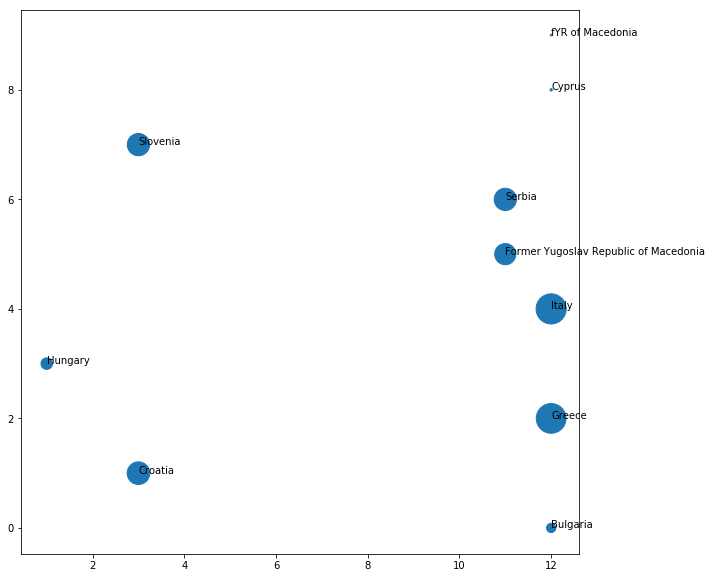

In [10]:
import matplotlib.pyplot as plt


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
max_month = {}
for country in country_names : 
    maximum_arrivals = 0
    maximum_month = -1
    for month_number in range(len(months)) :
        arrivals = total_by_month_and_country (country, months[month_number], data)
        if arrivals > maximum_arrivals :
            maximum_arrivals = arrivals
            maximum_month = month_number+1
    max_month [country] = maximum_month 
print(max_month)

x = []
y = []
s = []

for country in country_names : 
    x.append(max_month[country])
    y.append(country_names.index(country))
    s.append(total_by_month_and_country (country, months[max_month[country]-1], data)/200)
print(x,y,s)
fig, ax = plt.subplots()
ax.scatter(x,y,s=s)

fig.set_size_inches(10,10)

for i, country in enumerate(country_names): 
    ax.annotate(country, (x[i], y[i]))
plt.show()

In [5]:
# doubling the width of markers
country_names = []
for row in data:
    if row[1] not in country_names:
        country_names.append(row[1])
print(country_names)


['Bulgaria', 'Croatia', 'Greece', 'Hungary', 'Italy', 'Former Yugoslav Republic of Macedonia', 'Serbia', 'Slovenia', 'Cyprus', 'fYR of Macedonia']


In [6]:
def get_total_per_month_land(country, month, data):
    result = 0
    for row in data:
        if row[1] == country and month in row[0]:
            result += int(row[3].replace(',',''))
    return result
print(get_total_per_month_land('Greece','Jan', data2016))
print(get_total_per_month_land('Greece','Jan', data2017))

539
130


[934598, 2653753, 4408461, 4609366, 4833343, 4726939, 4934490, 5020961, 4965346, 5232766, 5127918, 5358459, 22083, 54603, 94351, 137206, 191274, 243084, 313594, 405185, 529024, 681392, 772670, 880060]
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
['Jan16', 'Feb16', 'Mar16', 'Apr16', 'May16', 'Jun16', 'Jul16', 'Aug16', 'Sep16', 'Oct16', 'Nov16', 'Dec16', 'Jan17', 'Feb17', 'Mar17', 'Apr17', 'May17', 'Jun17', 'Jul17', 'Aug17', 'Sep17', 'Oct17', 'Nov17', 'Dec17']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Text(0.5,1,'Cumulative total for Greece')

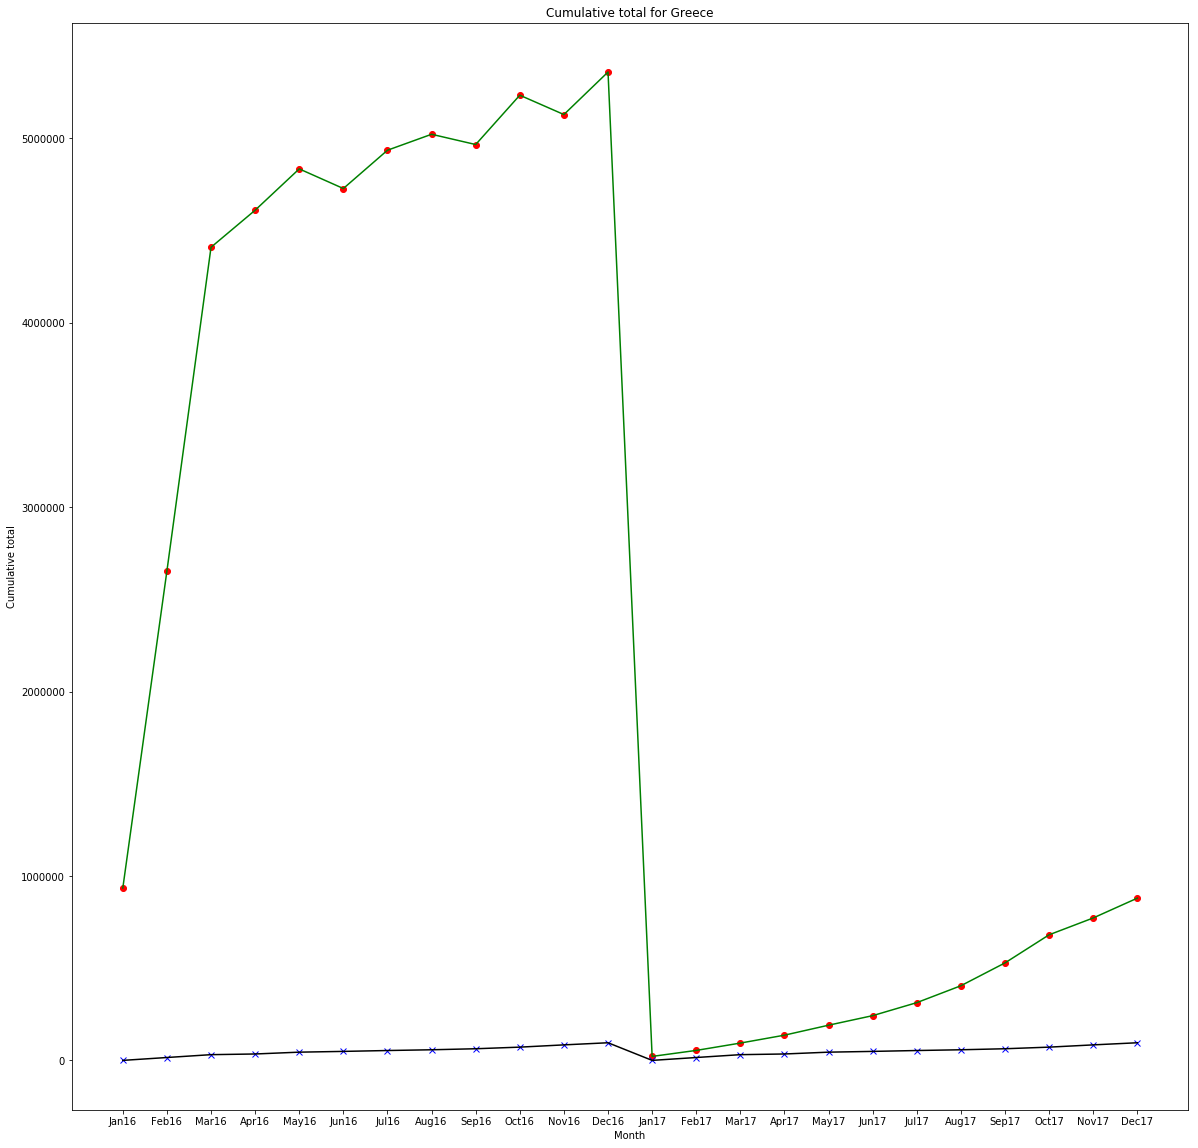

In [36]:
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
header, data16 = load_data('daily 2016_our project.csv')
header, data17 = load_data('daily 2017_our project.csv')

# get cumulative for these months
ctots_sea = []
ctots_land = []
country = 'Greece'
x = []
r = 0

for month in months:
    c = int(get_total_per_month_sea(country, month, data16))
    ctots_sea.append(c)
    c = int(get_total_per_month_land(country, month, data16))
    ctots_land.append(c)
    x.append(str(r) + '-' + month + '16')
    r += 1
    
for month in months:
    c = int(get_total_per_month_sea(country, month, data17))
    ctots_sea.append(c)
    c = int(get_total_per_month_land(country, month, data16))
    ctots_land.append(c)
    x.append(str(r) + '-' + month + '17')
    r += 1
    


print(ctots_sea)
plt.figure(figsize=(20,20))

print(months+months)

short_month_names = []
for month in x:
    # 01-Jan-16
    # becomes Jan-16
    short_month_names.append(' '.join(month.split('-')[1:2]))
print(short_month_names)
print(list(range(len(x))))

plt.plot(list(range(len(x))), ctots_sea, 'ro')
plt.plot(list(range(len(x))), ctots_sea, 'g')
plt.plot(list(range(len(x))), ctots_land, 'bx')
plt.plot(list(range(len(x))), ctots_land, 'k')


ax = plt.gca()
plt.xticks(list(range(len(x))))
ax.set_xticklabels(short_month_names)
plt.xlabel('Month')
plt.ylabel('Cumulative total')
plt.title('Cumulative total for ' + country)

In [8]:
l = ['a', '3']


['Bulgaria', 'Croatia', 'Greece', 'Hungary', 'Italy', 'Former Yugoslav Republic of Macedonia', 'Serbia', 'Slovenia', 'Cyprus', 'fYR of Macedonia']


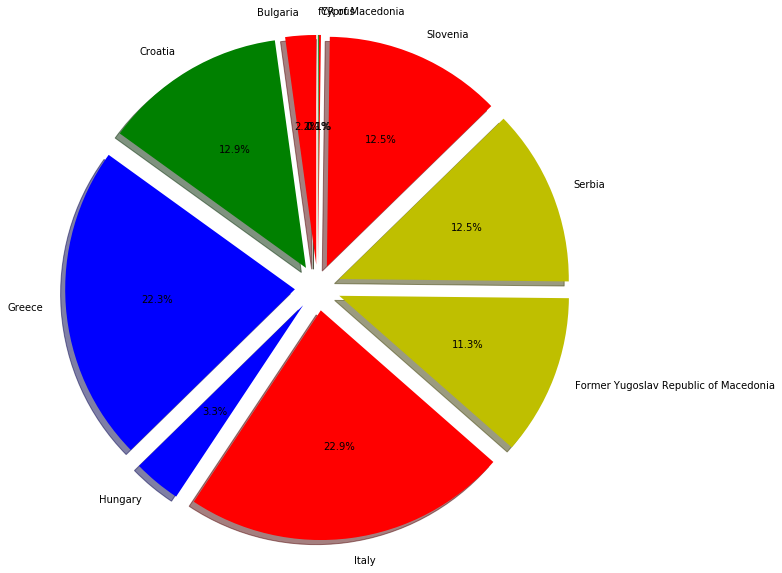

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
import random

country_names = []
for row in data:
    if row[1] not in country_names:
        country_names.append(row[1])
print(country_names)
labels = country_names
sizes = []
colors =[]
possible_colors = ['r','g','b','y']
for country in country_names:
    sizes.append(total_by_country(country,data))
    colors.append(random.choice(possible_colors))
    
    
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors, explode=[0.1] * len(country_names),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()